In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.001000,69.195000,68.119000
std,NaN,NaN,NaN,NaN,NaN,15.569567,14.706436,15.226381
min,NaN,NaN,NaN,NaN,NaN,0.000000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.000000,59.000000,58.000000
50%,NaN,NaN,NaN,NaN,NaN,66.000000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.000000,79.250000,79.000000


# Number of male and female participants

In [6]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Number of males participated: 482
Number of females participated: 518 

# Student's parental level of education

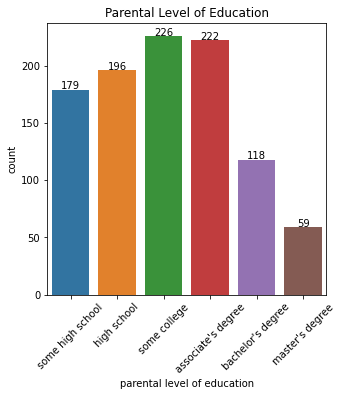

In [7]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='parental level of education',data=df)
plt.title('Parental Level of Education')
plt.xticks(rotation=45)

i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+0.5,height,ha='center')
    i+=1
    
plt.show()

* Most of the parents have either a college degree or a associate's degree

* Very few parents have a master's degree

# Who scored most on average

In [8]:
df['average']=df.mean(numeric_only=True,axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667


# Gender

In [9]:
df.groupby('gender')['average'].max()

gender
female    100.0
male      100.0
Name: average, dtype: float64

# Test preparation course	

In [10]:
df.groupby('test preparation course')['average'].max()

test preparation course
completed    100.0
none         100.0
Name: average, dtype: float64

In [11]:
df[(df['average']==100.0)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
516,female,group E,bachelor's degree,standard,none,100,100,100,100.0
517,female,group E,associate's degree,standard,none,100,100,100,100.0
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.0


Based on gender two females and one male scored the most average

Based on test preparation two with no preparation and one who completed the preparation scored most on average

In [12]:
df.drop('average',axis=1,inplace=True)

# Scoring variation for math, reading and writing 

# Gender

In [13]:
df.groupby(df['gender']).std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [14]:
df.groupby(df['gender']).var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


* Score variation is greater for females in maths

* Score variation is least for males in reading

#  Test preparation course

In [15]:
df.groupby(df['test preparation course']).std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [16]:
df.groupby(df['test preparation course']).var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


* Score variation is greater in math for no test preparation

* Score variation is least in writing for completed test preparation

# Top 25% of students based on their maths score

In [19]:
df['math score'].describe()

count    1000.000000
mean       66.001000
std        15.569567
min         0.000000
25%        57.000000
50%        66.000000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [21]:
df[df['math score']>=77]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


There are 255 students scoring the top 25% score in maths